# PCA

PCA(Principal Component Analysis)는 주성분 분석이라고도 하며 차원 축소를 통해 최소 차원의 정보로 원래 차원의 정보를 모사(approximate)하려는 작업을 말한다.

## 차원 축소

차원 축소란(Dimension Reduction) 고차원 벡터에서 일부 차원의 값을 모두 0으로 만들어(truncation) 저차원 벡터로 줄이는 것을 말한다.

다만 원래의 고차원 벡터의 특성을 최대한 살리기 위해 가장 분산이 높은 방향으로 회전 변환(rotation transform)을 한다.

<img src="https://alliance.seas.upenn.edu/~cis520/dynamic/2014/wiki/uploads/Lectures/pca-example-1D-of-2D_small.png" style="width:40%; margin: 0 auto 0 auto;">


<img src="http://www.nlpca.org/fig_pca_principal_component_analysis.png" style="width:90%; margin: 0 auto 0 auto;">

3차원을 2차원으로만 해도 거의 비슷한 데이터가 나온다.

Scikit-Learn 의 decomposition 서브패키지는 PCA분석을 위한 `PCA` 클래스를 제공한다. 사용법은 다음과 같다.


* 입력 인수:	
  * n_components : 정수
    * 최종 성분의 수


* 속성:	
 * `components_`   
    * 주성분 축
 * `n_components_`    이게 제일 처음 나오는 파라미터이다. 이것만 남기고 나머지 람다 작은거는 죽이겠다는 의미로 중요하다.
    * 주성분의 수
 * `mean_` :
    * 각 성분의 평균
 * `explained_variance_ratio_` 
    * 각 성분의 분산 비율


## 2차원 PCA의 예

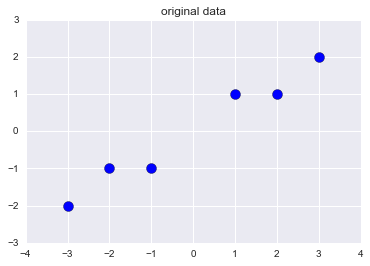

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

In [4]:
Z = pca.transform(X)
Z

array([[-1.3834058 ,  0.29357862],
       [-2.22189802, -0.25133497],
       [-3.60530382,  0.04224366],
       [ 1.3834058 , -0.29357862],
       [ 2.22189802,  0.25133497],
       [ 3.60530382, -0.04224366]])

In [5]:
w, V = np.linalg.eig(pca.get_covariance())

In [6]:
V.T.dot(X.T).T   # 이 V는 축이 하나 없어진 V이다. 뒤에 부호가 바뀐 이유는 아이겐 밸류에서 중요한 것은 절대값이다. 바뀔 수 있다.

array([[-1.3834058 , -0.29357862],
       [-2.22189802,  0.25133497],
       [-3.60530382, -0.04224366],
       [ 1.3834058 ,  0.29357862],
       [ 2.22189802, -0.25133497],
       [ 3.60530382,  0.04224366]])

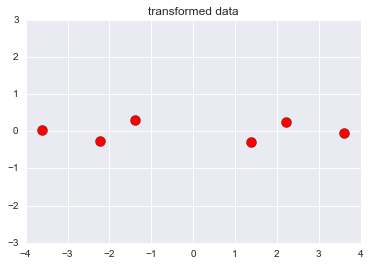

In [8]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

위로 세워지지 않고 옆으로 뻗은 이유는 확률 변수의 좌표 변환 이야기를 다시 하는 것이다.~~

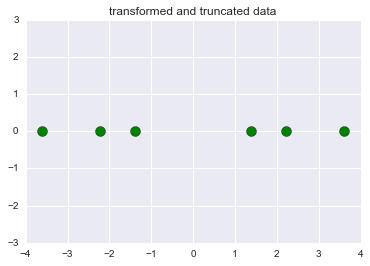

In [9]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

## IRIS 데이터의 예

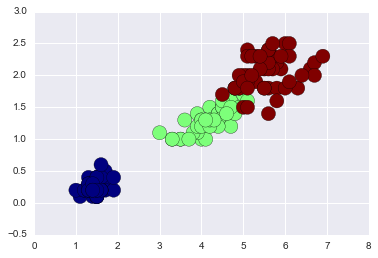

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,2:]
plt.scatter(X[:, 0], X[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);

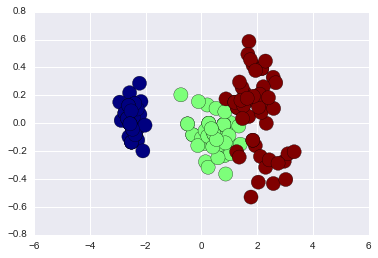

In [11]:
X2 = PCA(2).fit_transform(X)  #이 안에 2라는 숫자는 무엇이냐? 나중에 2차원으로 해라. 원래 2차원인데? 회전만 시켜라. 이렇게 하면
# 사실 x2를 볼 필요가 없고 x1만 보면 된다.
plt.scatter(X2[:, 0], X2[:, 1], c=iris.target, s=200, cmap=plt.cm.jet)
plt.xlim(-6, 6)
plt.show()

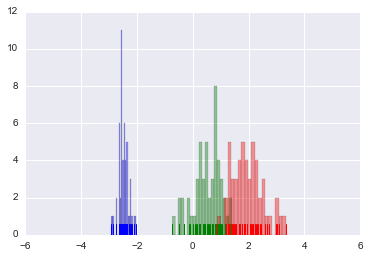

In [12]:
X1 = PCA(1).fit_transform(X)
sns.distplot(X1[iris.target==0], color="b", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==1], color="g", bins=20, rug=True, kde=False)
sns.distplot(X1[iris.target==2], color="r", bins=20, rug=True, kde=False)
plt.xlim(-6, 6)
plt.show()

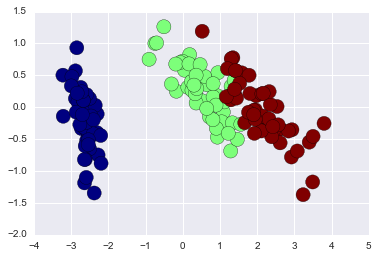

In [13]:
X3 = PCA(2).fit_transform(iris.data)   #여기서는 4개가 다 들어갔다. 그 중에서 2개만 뽑은 것이다.
plt.scatter(X3[:, 0], X3[:, 1], c=iris.target, s=200, cmap=plt.cm.jet);
# 피처가 원래 4개가 있었는데 잘 조합해서 x1다시를 만든다. x2 마찬가지로 다시를 만들어서 조합을 하면 아주 선명하게 분리가 된다.

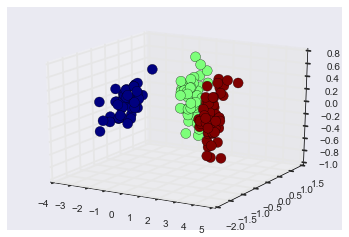

In [14]:
X4 = PCA(3).fit_transform(iris.data)  
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(azim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X4[:,0], X4[:,1], X4[:,2], c=iris.target, s=100, cmap=plt.cm.jet, alpha=1);
    ax.view_init(20, azim)

plot_pca(-60)

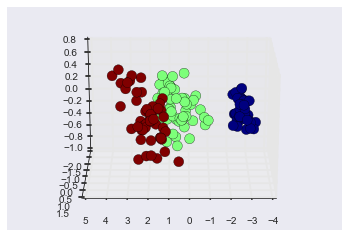

In [15]:
from ipywidgets import widgets
widgets.interact(plot_pca, azim=widgets.IntSlider(min=0, max=180, step=10, value=0));

## 이미지 PCA

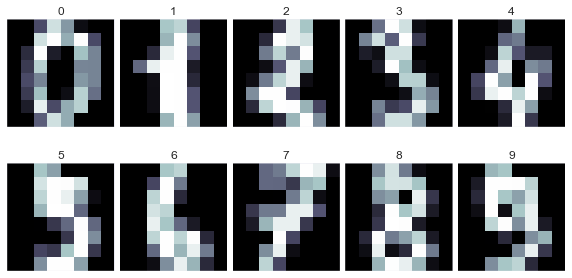

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target

N=2; M=5;
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none");
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[k])

다차원 공간에서 그림 1개는 점 1개이다. 예를 들어 0 한 개는 어느 한 공간(다른 은하계)에 모여 있다는 의미이다

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_digits)
print(X_digits.shape)
print(X_pca.shape)

(1797, 64)
(1797, 10)


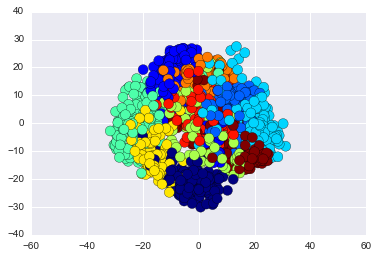

In [18]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_digits, s=100, cmap=plt.cm.jet)
plt.axis("equal")
plt.show()

지금은 2차원이라서 뭉쳐 있지만 차원을 늘릴수록 떨어져 있는다.

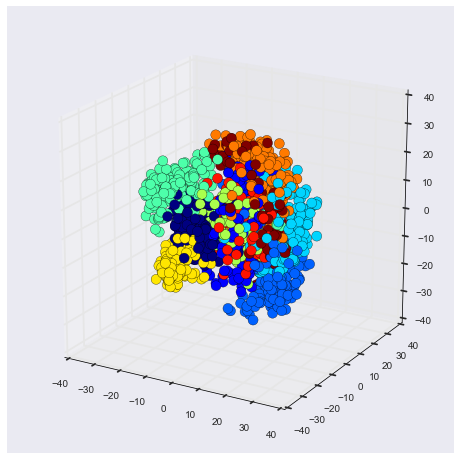

In [19]:
from mpl_toolkits.mplot3d import Axes3D

def plot_pca2(azim):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d');
    ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y_digits, s=100, cmap=plt.cm.jet, alpha=1);
    ax.view_init(20, azim)

plot_pca2(-60)

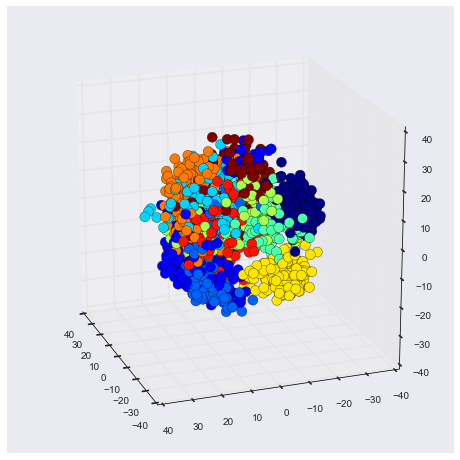

In [20]:
from ipywidgets import widgets
widgets.interact(plot_pca2, azim=widgets.IntSlider(min=0,max=180,step=10,value=0));

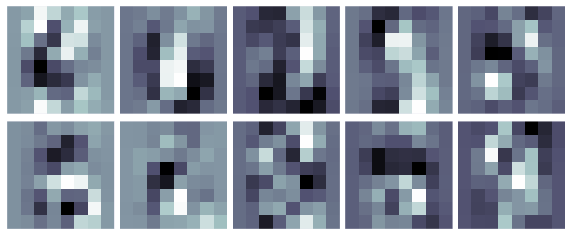

In [21]:
N=2; M=5;
fig = plt.figure(figsize=(10,3.2))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        p = fig.add_subplot(N, M, k+1)
        p.imshow(pca.components_[k].reshape((8,8)), cmap=plt.cm.bone, interpolation='none')
        plt.xticks([])
        plt.yticks([])    
        plt.grid(False)

* 이미지가 벡터이면 거꾸로 벡터도 이미지이다. 벡터도 점이기 때문에 거꾸로 이미지가 될 수 있다.
* bone을 썼기 때문에 하얀 것이 가장 변화가 심한 것이다. 0이 진한 부분이고 하얀 부분이 큰 부분이다. 그 방향으로 분산이 가장 크다는 의미이다. 검은색 부분은 잘 안 움직이는 것이고 흰색은 분산, 움직임이 크다는 것이다.
* 이미지 전체를 숫자 10개로만 나타낼 수 있고 저것들의 조합으로 다른 것들을 나타낼 수 있다.?

## Kernal PCA

데이터의 분리성을 향상시키기 위해 비선형 변환 $\phi(x)$ 을 한 데이터에 대해서 다시 PCA 적용하는 방법을 Kernel PCA라고 한다.

$$ x \;\; \rightarrow \;\; \phi(x) \;\; \rightarrow \;\; \text{PCA} \;\; \rightarrow \;\; z $$

비선형은 회전만으로는 찾아낼 수 없다. 그래서 왜곡된 정보로 만들어서 PCA를 적용하게끔 만든다

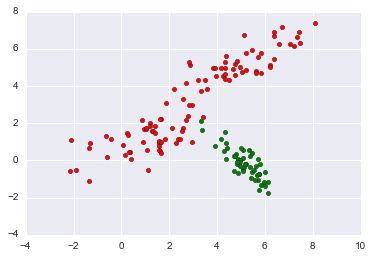

In [22]:
A1_mean = [1, 1]
A1_cov = [[2, 1], [1, 1]]
A1 = np.random.multivariate_normal(A1_mean, A1_cov, 50)
A2_mean = [5, 5]
A2_cov = [[2, 1], [1, 1]]
A2 = np.random.multivariate_normal(A2_mean, A2_cov, 50)
A = np.vstack([A1, A2])
B_mean = [5, 0]
B_cov = [[0.8, -0.7], [-0.7, 0.8]]
B = np.random.multivariate_normal(B_mean, B_cov, 50)
AB = np.vstack([A, B])

plt.scatter(A[:,0], A[:,1], c='r')
plt.scatter(B[:,0], B[:,1], c='g')
plt.show()

이런 좌표를 카테시안 좌표라고 한다. 카테시안? 좌표계(r과 세터_각도)를 이용하면 구할 수 있다. 비선형을 이용해서 구하는 방식을 커널방식이라고 한다.

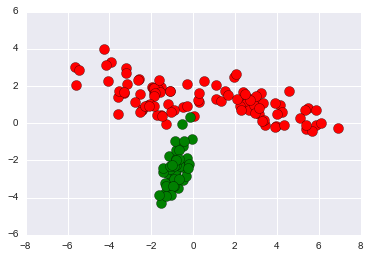

In [23]:
pca = PCA(n_components=2)
pca.fit(AB)
A_transformed = pca.transform(A)
B_transformed = pca.transform(B)
plt.scatter(A_transformed[:,0], A_transformed[:,1], c="r", s=100)
plt.scatter(B_transformed[:,0], B_transformed[:,1], c="g", s=100)
plt.show()

이걸로 차원 축소가 불가능하다.

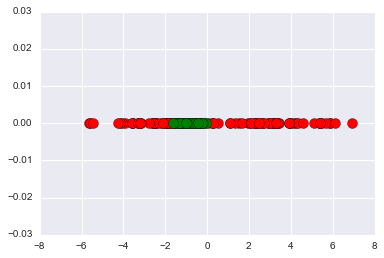

In [24]:
pca = PCA(n_components=1)
pca.fit(AB)
A_transformed = pca.transform(A)
B_transformed = pca.transform(B)
plt.scatter(A_transformed, np.zeros(len(A_transformed)), c="r", s=100)
plt.scatter(B_transformed, np.zeros(len(B_transformed)), c="g", s=100)
plt.show()

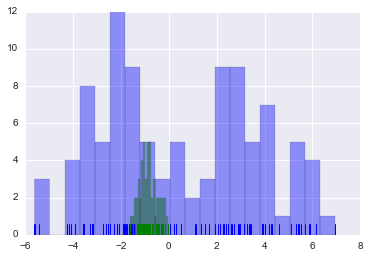

In [25]:
sns.distplot(A_transformed, color="b", bins=20, rug=True, kde=False)
sns.distplot(B_transformed, color="g", bins=20, rug=True, kde=False)
plt.show()

In [26]:
from sklearn.decomposition import KernelPCA

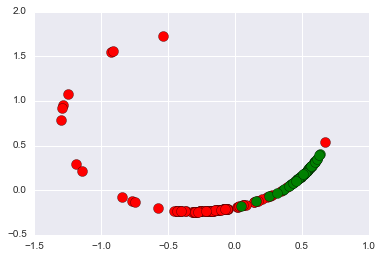

In [27]:
kpca = KernelPCA(kernel="cosine", n_components=2)   #데이터의 모양이 바뀐다. 이 때는 차원축소가 가능하다.
kpca.fit(AB)
A_transformed2 = kpca.transform(A)
B_transformed2 = kpca.transform(B)
plt.scatter(A_transformed2[:,0], A_transformed2[:,1], c="r", s=100)
plt.scatter(B_transformed2[:,0], B_transformed2[:,1], c="g", s=100)
plt.show()

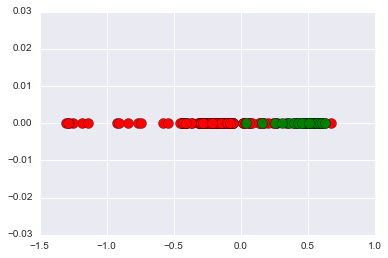

In [28]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(kernel="cosine", n_components=1)
kpca.fit(AB)
A_transformed2 = kpca.transform(A)
B_transformed2 = kpca.transform(B)
plt.scatter(A_transformed2, np.zeros(len(A_transformed2)), c="r", s=100)
plt.scatter(B_transformed2, np.zeros(len(B_transformed2)), c="g", s=100)
plt.show()

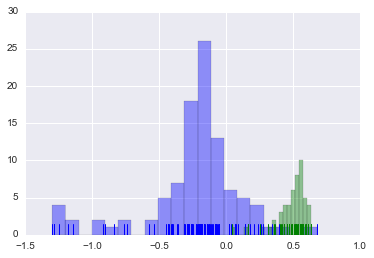

In [29]:
sns.distplot(A_transformed2, color="b", bins=20, rug=True, kde=False)
sns.distplot(B_transformed2, color="g", bins=20, rug=True, kde=False)
plt.show()

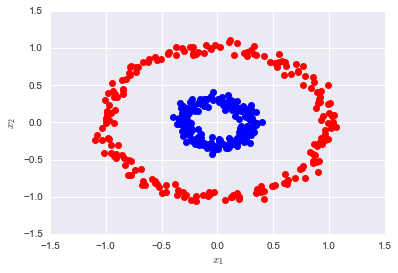

In [30]:
from sklearn.datasets import make_circles
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)
reds = y == 0
blues = y == 1
plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

디시전트리로는 이것을 나눌수 있다. 하지만 퍼셉트론이나 로지스틱회귀분석은 어떻게 해서도 나눌 수 없다.

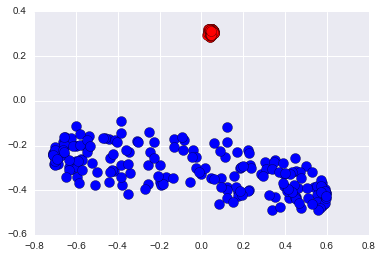

In [31]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)   #radial basis fuunction_rbf
kpca.fit(X)
A_transformed2 = kpca.transform(X[reds])
B_transformed2 = kpca.transform(X[blues])
plt.scatter(A_transformed2[:,0], A_transformed2[:,1], c="r", s=100)
plt.scatter(B_transformed2[:,0], B_transformed2[:,1], c="b", s=100)
plt.show()

## 성분 수의 결정

성분의 수가 같은 PCA로 변환된 데이터의 공분산 행렬의 고유값은 원래 데이터의 공분산 행렬의 고유값과 일치한다.
성분의 수를 줄여야 하는 경우에는 가장 고유값이 작은 성분부터 생략한다.


* 원래의  데이터 $X$의 공분산 행렬 $X^TX$의 고유값
 $$ \lambda_1, \lambda_2, \lambda_3, \cdots, \lambda_D $$


* PCA 변환한   데이터 $Z$의 공분산 행렬 $Z^TZ$의 고유값
 $$ \lambda_1,  \cdots, \lambda_L $$


* Explained Variance 
$$ \dfrac{\lambda_1 +  \cdots + \lambda_L}{\lambda_1 + \lambda_2 + \lambda_3 + \cdots + \lambda_D} < 1$$

그럼 몇 개를 자르는 것이 좋냐? 그건 분석가의 마음. 그래도 기준은? Explained Variance? 
잘라내고 나면 움직임이 줄어든다. 몇 개까지를 잘라내면 80%(임의)를 유지하느냐 하는 기준점을 찾아내는 것.

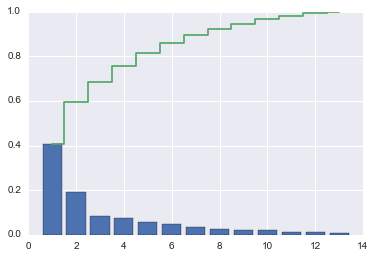

In [32]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

wine = fetch_mldata("wine")
X, y = wine.data, wine.target

pca = PCA().fit(X)
var = pca.explained_variance_
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])
plt.show()

최소한 5개는 남겨두어야 80% 이상을 유지할 수 있는 기준점이 된다. 차원을 줄이다보면 어느 순간 퍼포먼스가 살짝 올라갈 때가 있다. 경우에 따라서 공선성이 줄어드면 퍼포먼스의 베리언스가 줄어들기 때문에 살짝 올라간다. 그 때의 차원수를 선택해도 좋다.

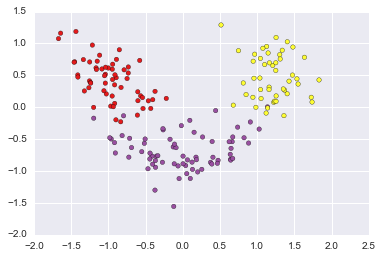

In [33]:
X_pca = PCA(2).fit_transform(X)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set1"))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
plt.show()

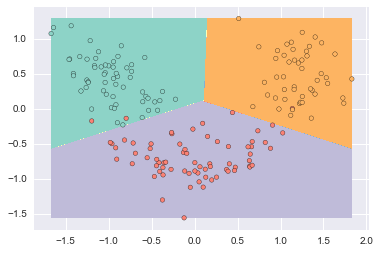

In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_pca, y)

xmin, xmax = X_pca[:,0].min(), X_pca[:,0].max()
ymin, ymax = X_pca[:,1].min(), X_pca[:,1].max()
XGrid, YGrid = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZGrid = np.reshape(clf.predict(np.array([XGrid.ravel(), YGrid.ravel()]).T), XGrid.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XGrid, YGrid, ZGrid, cmap=cmap)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap)
plt.show()

## 파이프라인

In [35]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

model1 = linear_model.LogisticRegression()
model1.fit(X_digits, y_digits)

pca = decomposition.PCA()
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X_digits, y_digits)

Pipeline(steps=[('pca', PCA(copy=True, n_components=None, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_digits, model1.predict(X_digits)))
print(classification_report(y_digits, model2.predict(X_digits)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      0.98      0.98       182
          2       1.00      1.00      1.00       177
          3       0.98      1.00      0.99       183
          4       1.00      1.00      1.00       181
          5       1.00      1.00      1.00       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       0.98      0.97      0.97       174
          9       1.00      0.98      0.99       180

avg / total       0.99      0.99      0.99      1797

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      1.00      0.98       182
          2       0.99      1.00      1.00       177
          3       0.99      0.99      0.99       183
          4       0.99      0.99      0.99       181
          5       0.99      0.99      0.99

# 실습

* 어떤 데이터들은 pca가 안 되는 경우가 있다.
* 배웠으니까 실습을 해보겠다. iris데이터로 해보겠다. 어떻게 해볼 것인가? iris데이터는 4차원이다. 2개를 뽑는 방법은 6가지이다. 6가지 경우에 대해 각각 logistic regression을 해서 precision 퍼포먼스를 실험해보자.

In [45]:
from itertools import combinations

In [46]:
for x in combinations(np.arange(4), 2):
    print(x)

(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)


In [47]:
from sklearn.datasets import load_iris
iris = load_iris()
y = iris.target

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

for idx in combinations(np.arange(4), 2):
    X = iris.data[:, idx]
    model = LogisticRegression().fit(X, y)
    print(precision_score(y, model.predict(X), average="micro"))   #average가 micro이면 가중치평균을 최소화 하겠다는 의미

0.766666666667
0.926666666667
0.906666666667
0.926666666667
0.946666666667
0.873333333333


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.90      0.70      0.79        50
          2       0.75      0.92      0.83        50

avg / total       0.88      0.87      0.87       150



In [50]:
from sklearn.decomposition import PCA

In [51]:
X = PCA(2).fit_transform(iris.data)
model = LogisticRegression().fit(X, y)
print(precision_score(y, model.predict(X)))

0.925879220961


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [52]:
print(classification_report(y, model.predict(X)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.97      0.76      0.85        50
          2       0.80      0.98      0.88        50

avg / total       0.93      0.91      0.91       150



### 이렇게 해서 PCA는 끝이 아니고 파이프라인

In [53]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

model1 = linear_model.LogisticRegression()
model1.fit(X_digits, y_digits)

pca = decomposition.PCA(16)
logistic = linear_model.LogisticRegression()
model2 = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
model2.fit(X_digits, y_digits)

Pipeline(steps=[('pca', PCA(copy=True, n_components=16, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [54]:
X_digits.shape

(1797, 64)

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_digits, model1.predict(X_digits)))
print(classification_report(y_digits, model2.predict(X_digits)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       178
          1       0.97      0.98      0.98       182
          2       1.00      1.00      1.00       177
          3       0.98      1.00      0.99       183
          4       1.00      1.00      1.00       181
          5       1.00      1.00      1.00       182
          6       1.00      1.00      1.00       181
          7       1.00      1.00      1.00       179
          8       0.98      0.97      0.97       174
          9       1.00      0.98      0.99       180

avg / total       0.99      0.99      0.99      1797

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       178
          1       0.90      0.95      0.92       182
          2       0.98      1.00      0.99       177
          3       0.98      0.95      0.97       183
          4       0.99      0.97      0.98       181
          5       0.96      0.96      0.96

## 질문 내용

* 기저벡터들 간 모두 독립인 것인가? 기저벡터의 정의를 알아야 한다. 기저벡터는 2개가 있다면 2차원에서 해당하는 모든 점들을 찍어낼 수 있는 조합을 만들어 낼 수 있는 것.
* 커널PCA에서 왜곡된 정보로 어떻게 바꾸는가? 커널을 사용하면 비선형 트렌스폼을 쓸 수 있다 정도만 알아둬라. 나중에 알려주겠다.

## 어제 내용 복습

* 가장 중요한 것은 좌표변환. x라는 벡터가 고정되어 있을 때 분해할 수 있다. 여러가지 방법 가능. e1, e2나 f1, f2 등 여러 벡터들로 가능하다. 하지만 조건은 e1, e2가 같은 방향만 아니면 된다.
* 아이겐 디컴포지션. transpose를 하게 되면 대각 모형이 독립 모양인 동그라미 형태로 바뀐다. 단위벡터일 경우에는 회전만 할 수 있다. 길이를 바꿀 수 없다.
* 크고 작은 게 뭐가 크고 작은 것인지? 내 생각에는 분산이라고 생각한다. 그러면 직접 공분산을 구해보아라.

In [38]:
X = np.array([[-1, -1], [-2, -1], [-3,-2], [1, 1], [2, 1], [3, 2]])
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [39]:
np.cov(X)

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.5,  0.5,  0. , -0.5, -0.5],
       [ 0. ,  0.5,  0.5,  0. , -0.5, -0.5],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -0.5, -0.5,  0. ,  0.5,  0.5],
       [ 0. , -0.5, -0.5,  0. ,  0.5,  0.5]])

In [40]:
np.cov(X.T)

array([[ 5.6,  3.6],
       [ 3.6,  2.4]])

In [41]:
npcov = np.cov(X.T, bias=True)
npcov

array([[ 4.66666667,  3.        ],
       [ 3.        ,  2.        ]])

In [42]:
L, V = np.linalg.eig(npcov)

In [43]:
L   #람다. 고유값

array([ 6.61628593,  0.05038073])

In [44]:
V   #고유벡터. 

array([[ 0.83849224, -0.54491354],
       [ 0.54491354,  0.83849224]])

* 이와 같은 상태가 컨디션이 안좋다는 의미이다. 옵티미제이션이 안되는 것은 계곡 모양으로 되어 있는 것
* 최저점을 찾기 힘든 것. 큰 값과 작은 값의 차이가 많이 나면. 람다끼리
* 아이겐밸류 차가 크게 나면 안된다. 없어도 되는 애가 있어서 다중공선성이 생긴 것이다. 그래서 PCA의 방법으로는 너무 작은 것은 없애버리겠다는 것. 그래서 2차원에서 1차원으로 없애면 된다.
* PCA는 차원 축소의 개념보다 회전의 의미를 두면 된다. 그렇게 해서 분산이 큰 것을 순서대로 정렬
* 예를 들어 basis가 4개가 생긴다. 그 안에서 어떤 조합으로 인해 가장 큰 v1을 만든다. 프로모션 할 때 들었던 돈, 서버의 장소 등등 영향을 미치는 요소들 중에서 가장 큰 아이겐벡터는 이것들을 어떤 식으로 조합한 것이다.
* 람다는 전체의 방향과 크기를 나타내고 각각의 데이터간의 알파원, 알파투는 각각에 해당하는 고유값
* 사람들 얼굴들의 특징들을 뽑아서 저장을 하고 나서 새로운 얼굴들을 만들어낸다.